In [206]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from __future__ import division
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

%matplotlib inline
matplotlib.style.use('ggplot')
#matplotlib.style.use('seaborn-poster')

path = '/home/casper/repos/openbr/scripts/'

In [16]:
rawMedsDf = pd.DataFrame.from_csv(path+'Algorithm_Dataset/FaceRecognition_MEDS.csv')
rawLfwDf = pd.DataFrame.from_csv(path+'eval_LFW.csv')
rawEigenfaceMedsDf = pd.DataFrame.from_csv(path+'Eigenfaces.csv')
rawEigenfaceLfwDf = pd.DataFrame.from_csv(path+'Eigenfaces_lwf.csv')


In [19]:
farMeds = rawMedsDf[rawMedsDf.index == 'DET']
farLfw = rawLfwDf[rawMedsDf.index == 'DET']
farEigMeds = rawEigenfaceMedsDf[rawEigenfaceMedsDf.index == 'DET']
farEigLfw = rawEigenfaceLfwDf[rawEigenfaceLfwDf.index == 'DET']

In [20]:
farMeds['Y-Normalized'] = 1 - farMeds.Y.astype('float')
farLfw['Y-Normalized'] = 1 - farLfw.Y.astype('float')
farEigMeds['Y-Normalized'] = 1 - farEigMeds.Y.astype('float')
farEigLfw['Y-Normalized'] = 1 - farEigLfw.Y.astype('float')

/home/casper/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/casper/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/casper/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [5]:
#farMeds.plot(x='X', y='Y-Normalized', figsize=(10,10), kind='line', title="True Accept rate vs False Accept Rate", xlim=(-0.01,1.01), ylim=(0.0,1.01))
#farLfw.plot(x='X', y='Y-Normalized', figsize=(10,10), kind='line', title="True Accept rate vs False Accept Rate", xlim=(-0.01,1.01), ylim=(0.0,1.01))

In [21]:
combinedFars = pd.DataFrame(
    {
        'X': farMeds.X.astype('float'),
        '4SF-MEDS': farMeds['Y-Normalized'],
        '4SF-LFW': farLfw['Y-Normalized'],
        'Eigenfaces-MEDS': farEigMeds['Y-Normalized'],
        'Eigenfaces-LFW': farEigLfw['Y-Normalized']
    }
)
combinedFars.head()

,4SF-LFW,4SF-MEDS,Eigenfaces-LFW,Eigenfaces-MEDS,X
Plot,,,,,
DET,0.013440,0.085305,0.000345,0.001034,0.000001
DET,0.013818,0.087700,0.000354,0.001063,0.000001
DET,0.014206,0.090162,0.000364,0.001093,0.000001
DET,0.014604,0.092693,0.000374,0.001124,0.000001
DET,0.015014,0.095295,0.000385,0.001155,0.000001


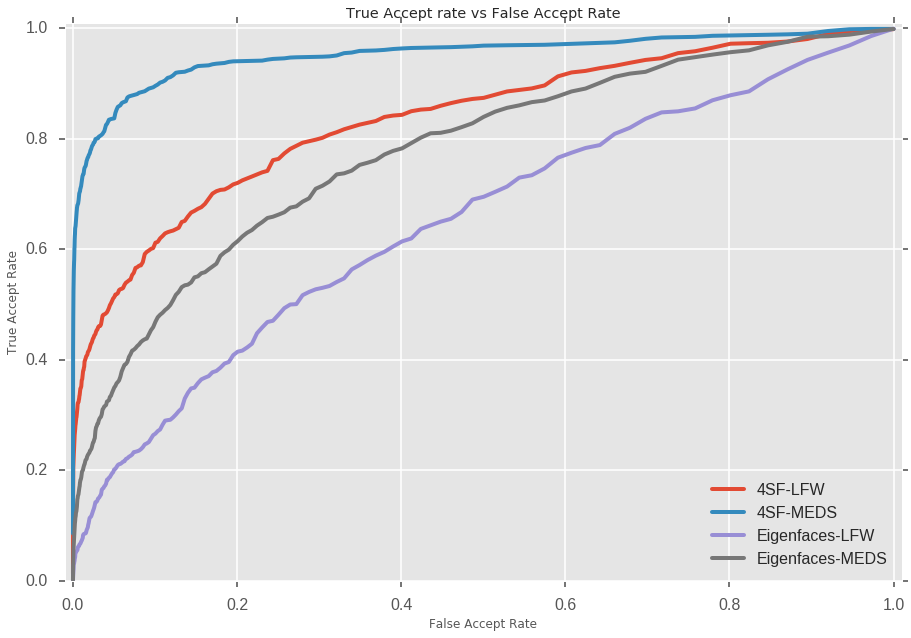

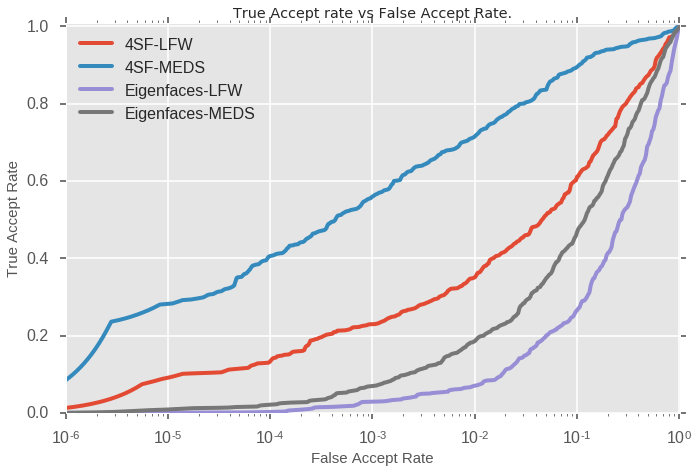

In [220]:
faceRecPlot = combinedFars.plot(x='X', figsize=(15,10), kind='line', title="True Accept rate vs False Accept Rate", xlim=(-0.01,1.01), ylim=(0.0,1.01), linewidth=4, logx=False)

faceRecPlot.set_xlabel('False Accept Rate')
faceRecPlot.set_ylabel('True Accept Rate')


faceRecPlotLog = combinedFars.plot(x='X', figsize=(11,7), kind='line', title="True Accept rate vs False Accept Rate.", xlim=(-0.01,1.01), ylim=(0.0,1.01), linewidth=4, logx=True)

faceRecPlotLog.set_xlabel('False Accept Rate', fontsize=15)
faceRecPlotLog.set_ylabel('True Accept Rate', fontsize=15)
l= faceRecPlotLog.get_legend()
l.shadow = True

In [23]:
print "UAC of 4SF, on MEDS dataset: {}".format(metrics.auc(combinedFars.X.values, combinedFars['4SF-MEDS']))
print "UAC of 4SF, on LFW dataset: {}".format(metrics.auc(combinedFars.X.values, combinedFars['4SF-LFW']))
print "UAC of Eigenfaces, on MEDS dataset: {}".format(metrics.auc(combinedFars.X.values, combinedFars['Eigenfaces-MEDS']))
print "UAC of Eigenfaces, on LFW dataset: {}".format(metrics.auc(combinedFars.X.values, combinedFars['Eigenfaces-LFW']))

UAC of 4SF, on MEDS dataset: 0.952588287769
UAC of 4SF, on LFW dataset: 0.835203934339
UAC of Eigenfaces, on MEDS dataset: 0.77677391468
UAC of Eigenfaces, on LFW dataset: 0.648904389859


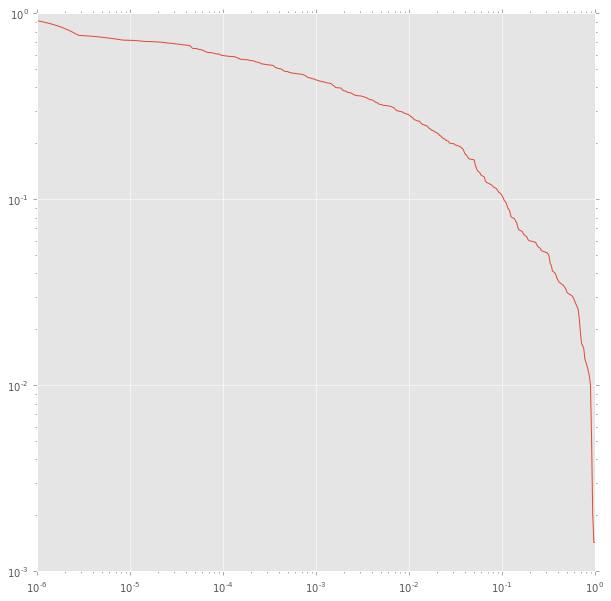

In [31]:
pd.Series(farMeds.Y.astype('float').values, index=farMeds.X.astype('float').values).plot(x='X', y='Y', figsize=(10,10), kind='line', logx=True, logy=True)

In [69]:
genuieMed = rawMedsDf[(rawMedsDf.index == 'SD') & (rawMedsDf.Y == 'Genuine')].X.astype('float')
imposterMed = rawMedsDf[(rawMedsDf.index == 'SD') & (rawMedsDf.Y == 'Impostor')].X.astype('float')

genuineEigenMeds = rawEigenfaceMedsDf[(rawEigenfaceMedsDf.index == 'SD') & (rawEigenfaceMedsDf.Y == 'Genuine')].X.astype('float')
imposterEigenMeds = rawEigenfaceMedsDf[(rawEigenfaceMedsDf.index == 'SD') & (rawEigenfaceMedsDf.Y == 'Impostor')].X.astype('float')


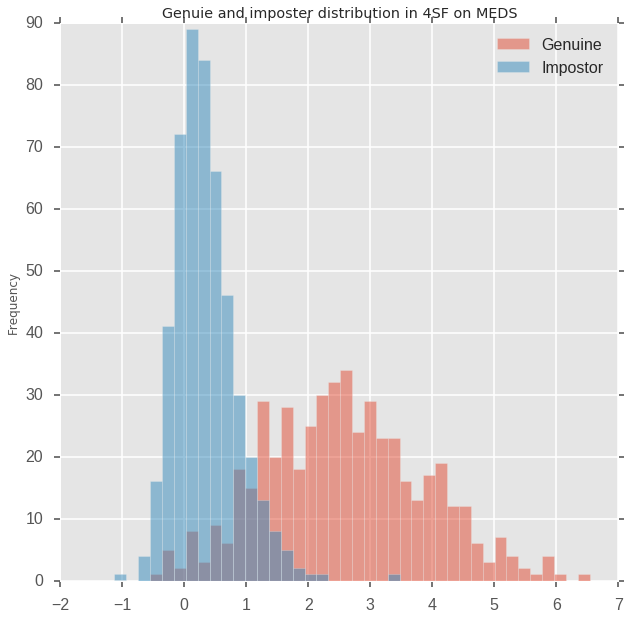

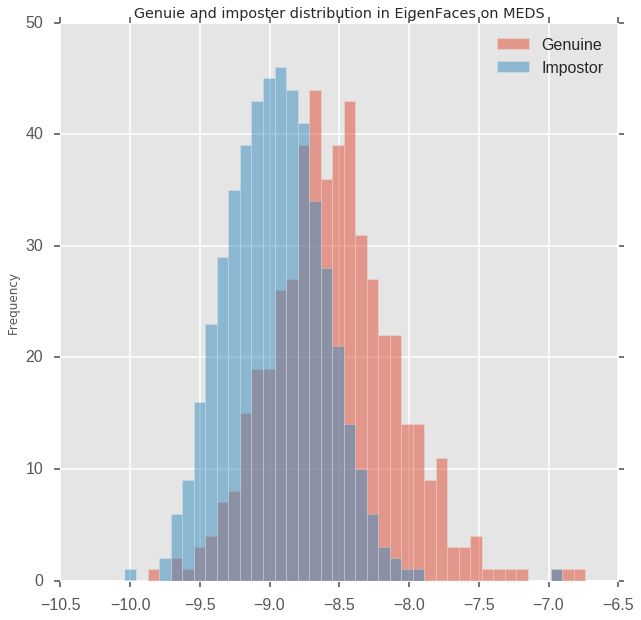

In [204]:
h1 = pd.DataFrame({
        'Genuine': genuieMed,
        'Impostor': imposterMed
    }).plot.hist(alpha=0.5, figsize=(10,10),bins=40, title="Genuie and imposter distribution in 4SF on MEDS")

h2 = pd.DataFrame({
        'Genuine': genuineEigenMeds,
        'Impostor': imposterEigenMeds
    }).plot.hist(alpha=0.5, figsize=(10,10),bins=40, title="Genuie and imposter distribution in EigenFaces on MEDS")


In [92]:
cmcEighenfaceLfw = rawEigenfaceLfwDf[rawEigenfaceLfwDf.index == 'CMC']
cmcEighenfaceLfw.X = cmcEighenfaceLfw.X.astype('float')
cmcEighenfaceLfw.Y = cmcEighenfaceLfw.Y.astype('float')

cmcEighenfaceMEDS = rawEigenfaceMedsDf[rawEigenfaceMedsDf.index == 'CMC']
cmcEighenfaceMEDS.X = cmcEighenfaceMEDS.X.astype('float')
cmcEighenfaceMEDS.Y = cmcEighenfaceMEDS.Y.astype('float')

cmc4SFMEDS = rawMedsDf[rawMedsDf.index == 'CMC']
cmc4SFMEDS.X = cmc4SFMEDS.X.astype('float')
cmc4SFMEDS.Y = cmc4SFMEDS.Y.astype('float')

cmc4SFLFW = rawLfwDf[rawLfwDf.index == 'CMC']
cmc4SFLFW.X = cmc4SFLFW.X.astype('float')
cmc4SFLFW.Y = cmc4SFLFW.Y.astype('float')


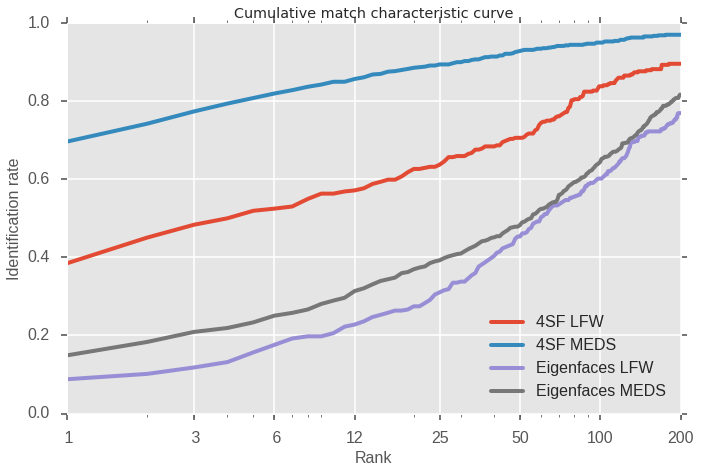

In [222]:

cmcPlotDataFrame = pd.DataFrame({
        'x': cmcEighenfaceLfw.X,
        '4SF MEDS': cmc4SFMEDS.Y,
        '4SF LFW': cmc4SFLFW.Y,
        'Eigenfaces MEDS': cmcEighenfaceMEDS.Y,
        'Eigenfaces LFW': cmcEighenfaceLfw.Y
    })

cmcPlot = cmcPlotDataFrame.plot(x='x', figsize=(11,7), logx=True, ylim=(0.0,1.0), linewidth=4, title="Cumulative match characteristic curve", xticks=[1,3,6,12,25,50,100,200])
cmcPlot.set_xlabel('Rank', fontsize=16)
cmcPlot.set_ylabel('Identification rate', fontsize=16)
cmcPlot.xaxis.set_major_formatter(FormatStrFormatter('%2.0f'))

In [164]:
ietLfw = rawLfwDf[rawLfwDf.index == 'IET']
ietLfw.Y = ietLfw.Y.astype('float')
ietLfw.X = ietLfw.X.astype('float')

ietEigenfaceLfw = rawEigenfaceLfwDf[rawEigenfaceLfwDf.index == 'IET']
ietEigenfaceLfw.Y = ietEigenfaceLfw.Y.astype('float')
ietEigenfaceLfw.X = ietEigenfaceLfw.X.astype('float')


In [165]:
ietCombined = pd.DataFrame({
        'X': ietLfw.X,
        '4SF LFW': ietLfw.Y,
        'Eigenfaces LFW': ietEigenfaceLfw.Y
    })

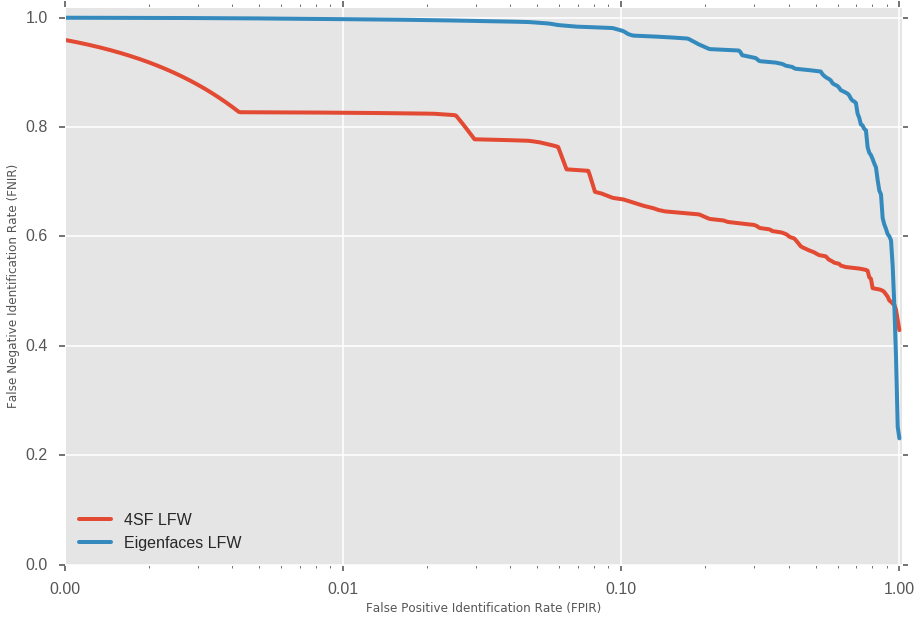

In [215]:
ietPlot = ietCombined.plot(x='X', logx=True, logy=False, figsize=(15,10), linewidth=4, xlim=(0,1.02), ylim=(0.0,1.02))
ietPlot.set_xlabel('False Positive Identification Rate (FPIR)')
ietPlot.set_ylabel('False Negative Identification Rate (FNIR)')
ietPlot.xaxis.set_major_formatter(FormatStrFormatter('%2.2f'))

In [153]:


errorRatesMeds = pd.DataFrame({
        'X': rawLfwDf[rawLfwDf.index == 'FAR'].X.astype('float').values,
        'FAR': rawLfwDf[rawLfwDf.index == 'FAR'].Y.astype('float').values,
        
    })


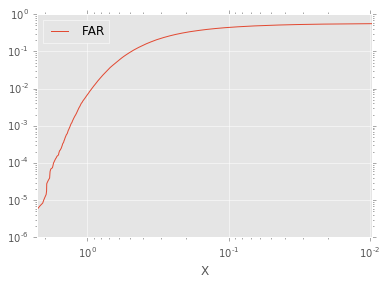

In [155]:
errorRatesMeds.plot(x='X', logy=True, logx=True)

In [195]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'dark_background', u'bmh', u'seaborn-talk', u'grayscale', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [223]:
combinedFars.to_csv('OpenBR_ROC')